In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata
import mudata
from sklearn.linear_model import LinearRegression
import functools

import os
from mx.mx_inspect import mx_inspect_rows, mx_inspect_cols

def nd(arr):
    return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, c="k", alpha=0.75, zorder=0)
    ax.set(**{"aspect": "equal", "xlim": lims, "ylim": lims})
    return ax
fsize = 16
plt.rcParams.update({"font.size": fsize})
%config InlineBackend.figure_format = 'retina'

In [49]:
def mk_mudata(rna_path, tag_path, protein_path, atac_path, rna_onlist, atac_onlist):
    rna = anndata.read_h5ad(rna_path)
    tag = anndata.read_h5ad(tag_path)
    protein = anndata.read_h5ad(protein_path)
    atac = anndata.read_h5ad(atac_path)
    
    # map between the atac barcodes and the rna barcodes
    gwl = pd.read_csv(rna_onlist, header=None, names=["rna"]) # 10x_version3_whitelist.txt
    awl = pd.read_csv(atac_onlist, header=None, names=["ata"]) # 737K-arc-v1_rc.txt
    
    # Map BCs between RNA and ATAC
    bcmap = pd.concat([awl, gwl], axis=1).set_index("ata")
    
    atac.obs["ata_bcs"] = atac.obs.index.values
    atac.obs["rna_bcs"] = atac.obs.index.map(bcmap["rna"])
    atac.obs.set_index("rna_bcs", inplace=True)
    
    common = np.intersect1d(
                np.intersect1d(
                    np.intersect1d(
                        rna.obs.index.values, atac.obs.index.values), 
                    tag.obs.index.values), 
                protein.obs.index.values)
    
    rna = rna[common].copy()
    rna.obs = mx_inspect_rows(rna.X.copy(), rna.obs.index.values).copy()
    rna.var = mx_inspect_cols(rna.X.copy(), rna.var.index.values).copy()
    
    tag = tag[common].copy()
    tag.obs = mx_inspect_rows(tag.X.copy(), tag.obs.index.values).copy()
    tag.var = mx_inspect_cols(tag.X.copy(), tag.var.index.values).copy()
    
    protein = protein[common].copy()
    protein.obs = mx_inspect_rows(protein.X.copy(), protein.obs.index.values).copy()
    protein.var = mx_inspect_cols(protein.X.copy(), protein.var.index.values).copy()
    
    atac = atac[common].copy()
    atac.obs = mx_inspect_rows(atac.X.copy(), atac.obs.index.values).copy()
    atac.var = mx_inspect_cols(atac.X.copy(), atac.var.index.values).copy()
    
    
    m = mudata.MuData({
        "rna": rna, 
        "tag": tag,
        "protein": protein,
        "atac": atac
    })
    return m

# Load Data

In [ ]:
base = "/home/sina/projects/cellatlas/data/dogmaseq-lll"
lll_1 = mk_mudata(
    os.path.join(base, "rna_rep1/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "tag_rep1/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "protein_rep1/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "atac_rep1/counts_mult/adata.h5ad"),
    os.path.join(base, "RNA-737K-arc-v1.txt"),
    os.path.join(base, "ATA-737K-arc-v1_rc.txt"),
)

base = "/home/sina/projects/cellatlas/data/dogmaseq-dig"
dig_1 = mk_mudata(
    os.path.join(base, "rna_rep1/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "tag_rep1/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "protein_rep1/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "atac_rep1/counts_mult/adata.h5ad"),
    os.path.join(base, "RNA-737K-arc-v1.txt"),
    os.path.join(base, "ATA-737K-arc-v1_rc.txt"),
)

base = "/home/sina/projects/cellatlas/data/dogmaseq-lll"
lll_2 = mk_mudata(
    os.path.join(base, "rna_rep2/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "tag_rep2/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "protein_rep2/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "atac_rep2/counts_mult/adata.h5ad"),
    os.path.join(base, "RNA-737K-arc-v1.txt"),
    os.path.join(base, "ATA-737K-arc-v1_rc.txt"),
)

base = "/home/sina/projects/cellatlas/data/dogmaseq-dig"
dig_2 = mk_mudata(
    os.path.join(base, "rna_rep2/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "tag_rep2/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "protein_rep2/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "atac_rep2/counts_mult/adata.h5ad"),
    os.path.join(base, "RNA-737K-arc-v1.txt"),
    os.path.join(base, "ATA-737K-arc-v1_rc.txt"),
)

base = "/home/sina/projects/cellatlas/data/dogmaseq-lll"
lll = mk_mudata(
    os.path.join(base, "rna/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "tag/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "protein/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "atac/counts_mult/adata.h5ad"),
    os.path.join(base, "RNA-737K-arc-v1.txt"),
    os.path.join(base, "ATA-737K-arc-v1_rc.txt"),
)

base = "/home/sina/projects/cellatlas/data/dogmaseq-dig"
dig = mk_mudata(
    os.path.join(base, "rna/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "tag/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "protein/counts_unfiltered/adata.h5ad"),
    os.path.join(base, "atac/counts_mult/adata.h5ad"),
    os.path.join(base, "RNA-737K-arc-v1.txt"),
    os.path.join(base, "ATA-737K-arc-v1_rc.txt"),
)

In [60]:
# Check that all of the features are the same (in the same order etc)
print(True in (lll_1["rna"].var.index.values != dig_1["rna"].var.index.values))
print(True in (lll_1["protein"].var.index.values != dig_1["protein"].var.index.values))
print(True in (lll_1["tag"].var.index.values != dig_1["tag"].var.index.values))
print(True in (lll_1["atac"].var.index.values != dig_1["atac"].var.index.values))

# Check that all of the features are the same (in the same order etc)
print(True in (lll_2["rna"].var.index.values != dig_2["rna"].var.index.values))
print(True in (lll_2["protein"].var.index.values != dig_2["protein"].var.index.values))
print(True in (lll_2["tag"].var.index.values != dig_2["tag"].var.index.values))
print(True in (lll_2["atac"].var.index.values != dig_2["atac"].var.index.values))

# Check that all of the features are the same (in the same order etc)
print(True in (lll["rna"].var.index.values != dig["rna"].var.index.values))
print(True in (lll["protein"].var.index.values != dig["protein"].var.index.values))
print(True in (lll["tag"].var.index.values != dig["tag"].var.index.values))
print(True in (lll["atac"].var.index.values != dig["atac"].var.index.values))

False
False
False
False
False
False
False
False
False
False
False
False


In [63]:
common_bcs = functools.reduce(np.intersect1d, [
    lll_1.obs.index.values,
    lll_2.obs.index.values,
    dig_1.obs.index.values,
    dig_2.obs.index.values,
    lll.obs.index.values,
    dig.obs.index.values,
])

In [64]:
common_bcs.shape

(133735,)

In [66]:
# make a bool mask for the barcodes that are common to all
lll_1.obs["common"] = lll_1.obs.index.isin(common_bcs)
lll_2.obs["common"] = lll_2.obs.index.isin(common_bcs)

dig_1.obs["common"] = dig_1.obs.index.isin(common_bcs)
dig_2.obs["common"] = dig_2.obs.index.isin(common_bcs)

lll.obs["common"] = lll.obs.index.isin(common_bcs)
dig.obs["common"] = dig.obs.index.isin(common_bcs)

# Compare LLL and DIG rep 1

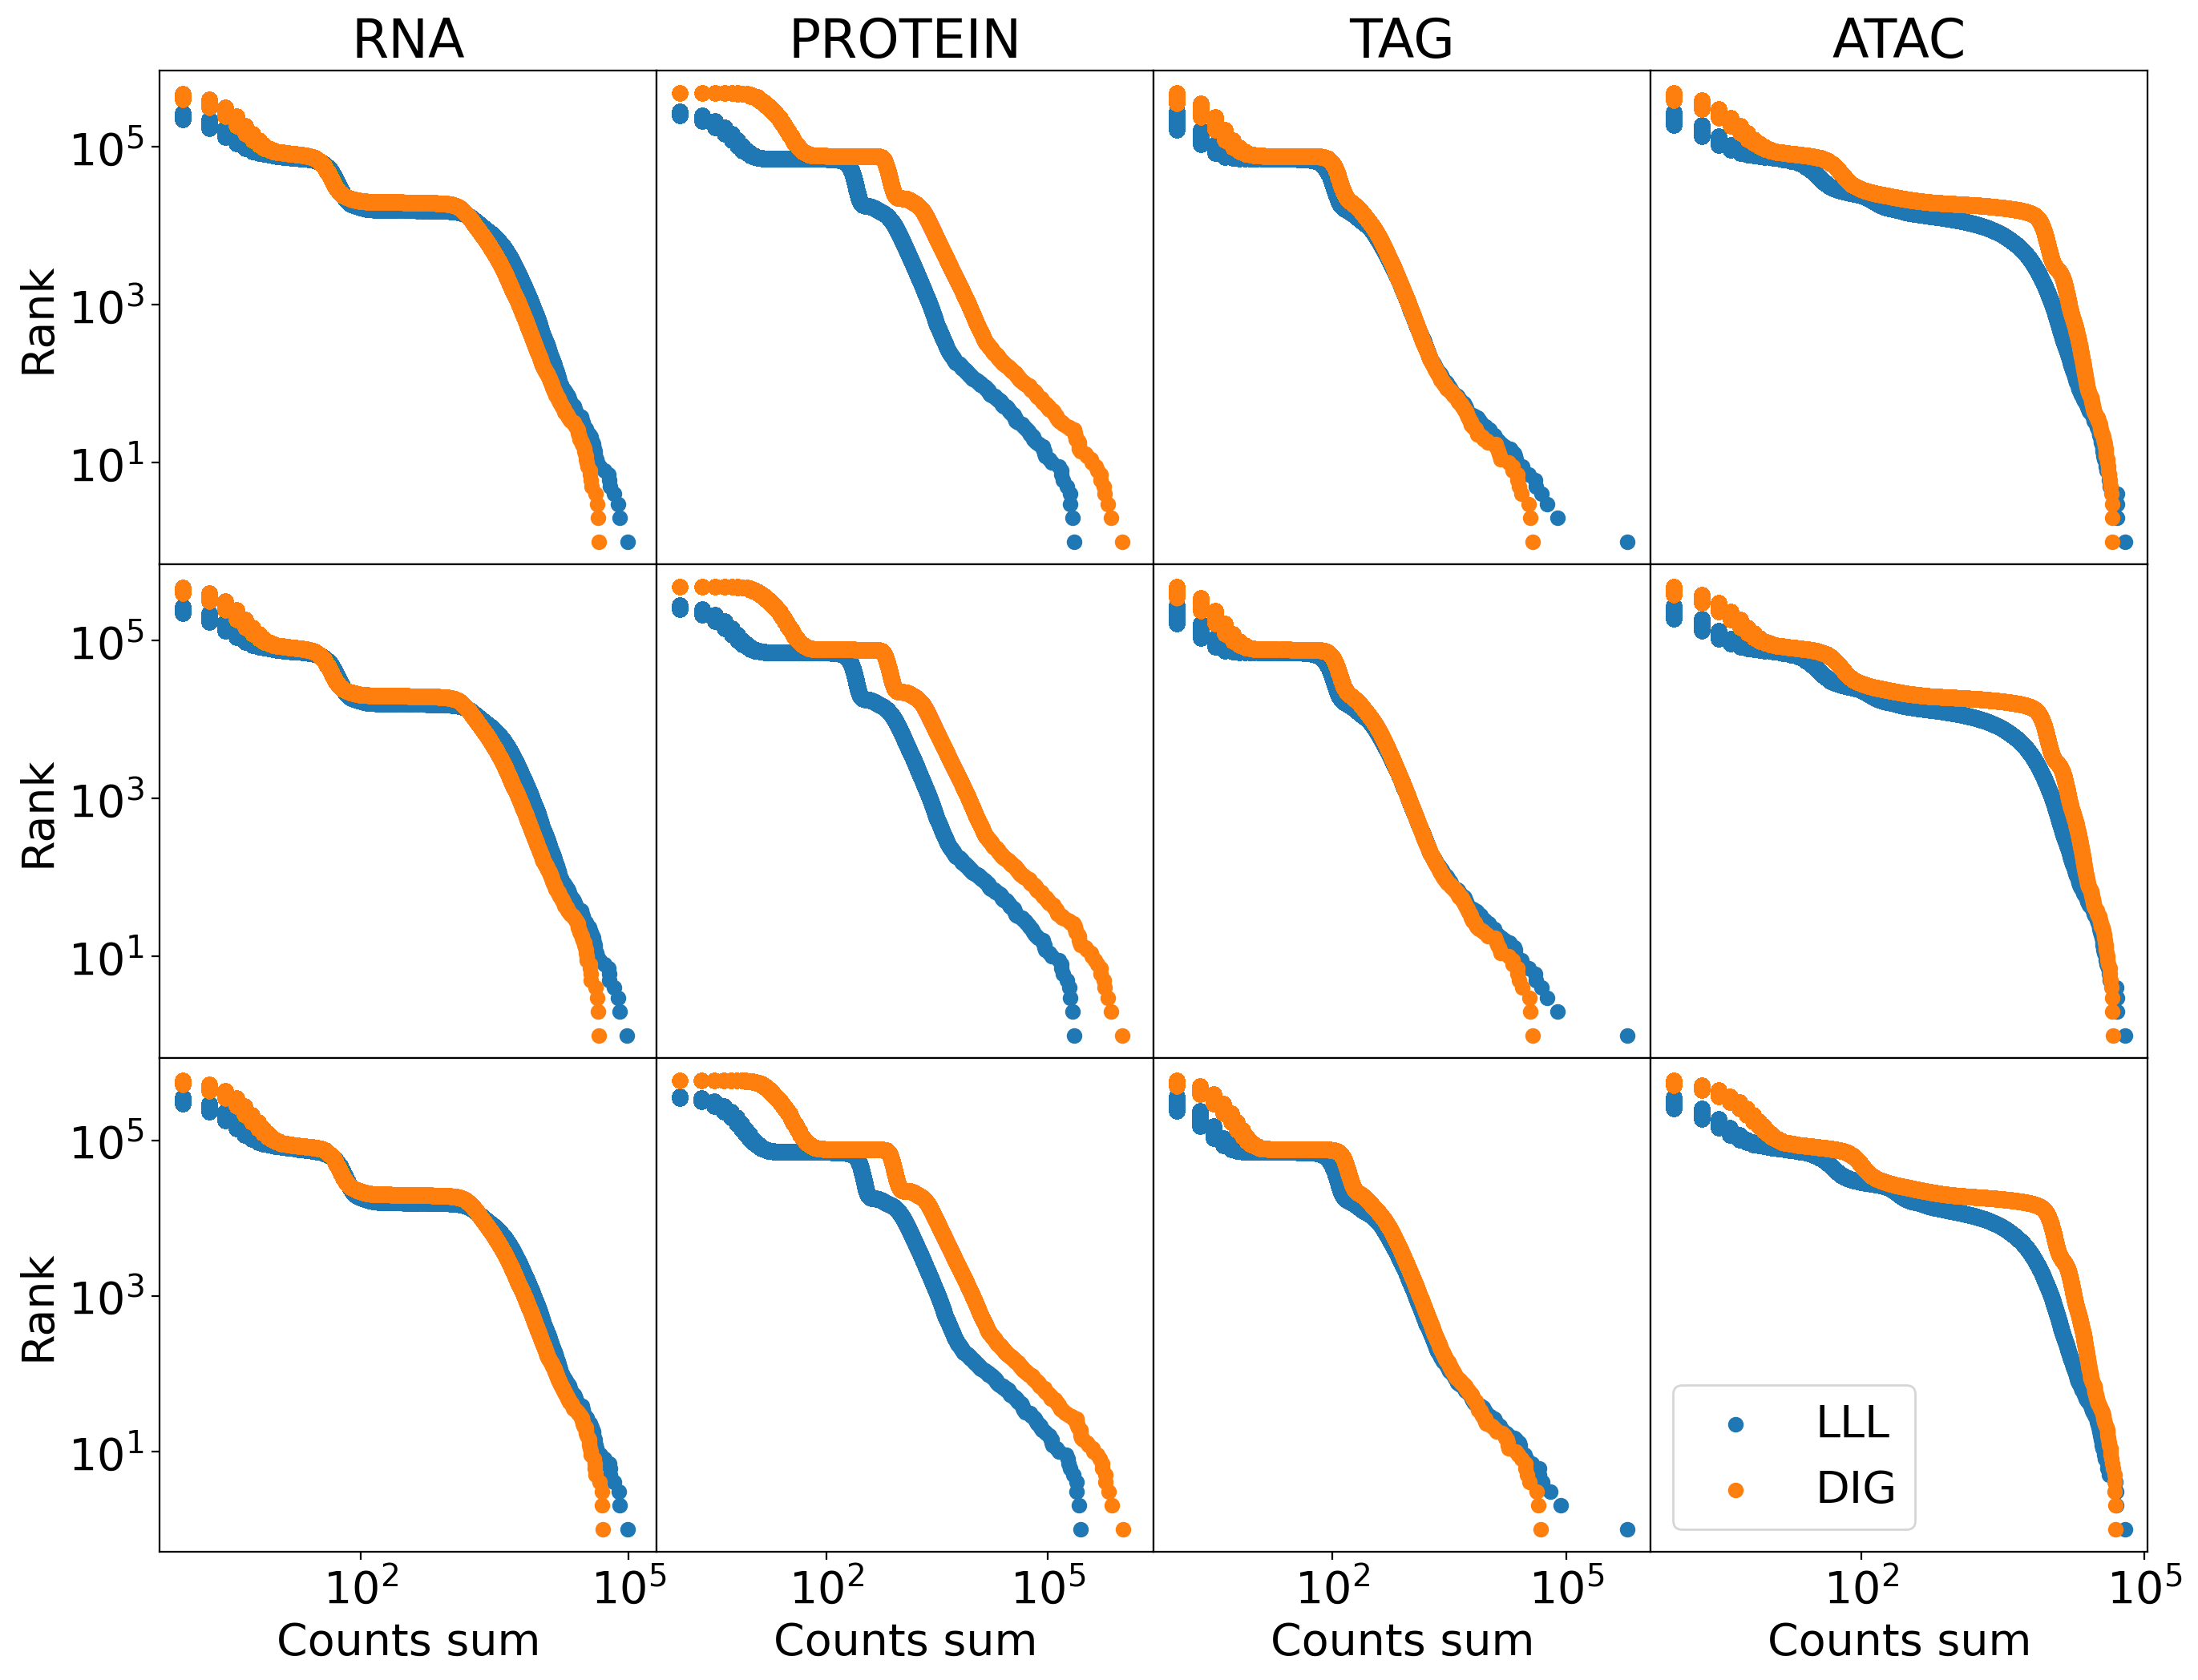

In [84]:
fig, axes = plt.subplots(figsize=(4*4,4*3), ncols=4, nrows=3)
fig.subplots_adjust(hspace=0, wspace=0)
for idx, (axs, (ll, dg)) in enumerate(zip(axes, [(lll_1, dig_1), (lll_2, dig_2), (lll, dig)])):
    for ax, m in zip(axs, ["rna", "protein", "tag", "atac"]):
        measure = "counts_sum"
        
        xlabel = ""
        ylabel = ""
        title = ""
        xticks = []
        yticks = []
        xticklabels = []
        yticklabels = []
        
        if m == "atac":
            measure = "counts_nnzero"
            xlabel = "Counts nonzero"
    
        x = np.sort(ll[m].obs[measure])[::-1]
        y = np.arange(x.shape[0])
        
        ax.scatter(x,y, label="LLL")
        
        x = np.sort(dg[m].obs[measure])[::-1]
        y = np.arange(x.shape[0])
        
        ax.scatter(x,y, label="DIG")

        
        if idx == 0:
            title = m.upper()
        if m == "rna":
            ylabel = "Rank"
        if idx == 2:
            xlabel = "Counts sum"
            if m == "atac":
                xlabel = "Counts nonzero"

        ax.set(**{
            "xlabel": xlabel,
            "ylabel": ylabel,
            "xscale": "log",
            "yscale": "log",
            "title": title,
        })
        if idx != 2:
            ax.set_xticks([])
            ax.set_xticklabels([])
        if m != "rna":
            ax.set_yticks([])
            ax.set_yticklabels([])

ax.legend()
fig.show()

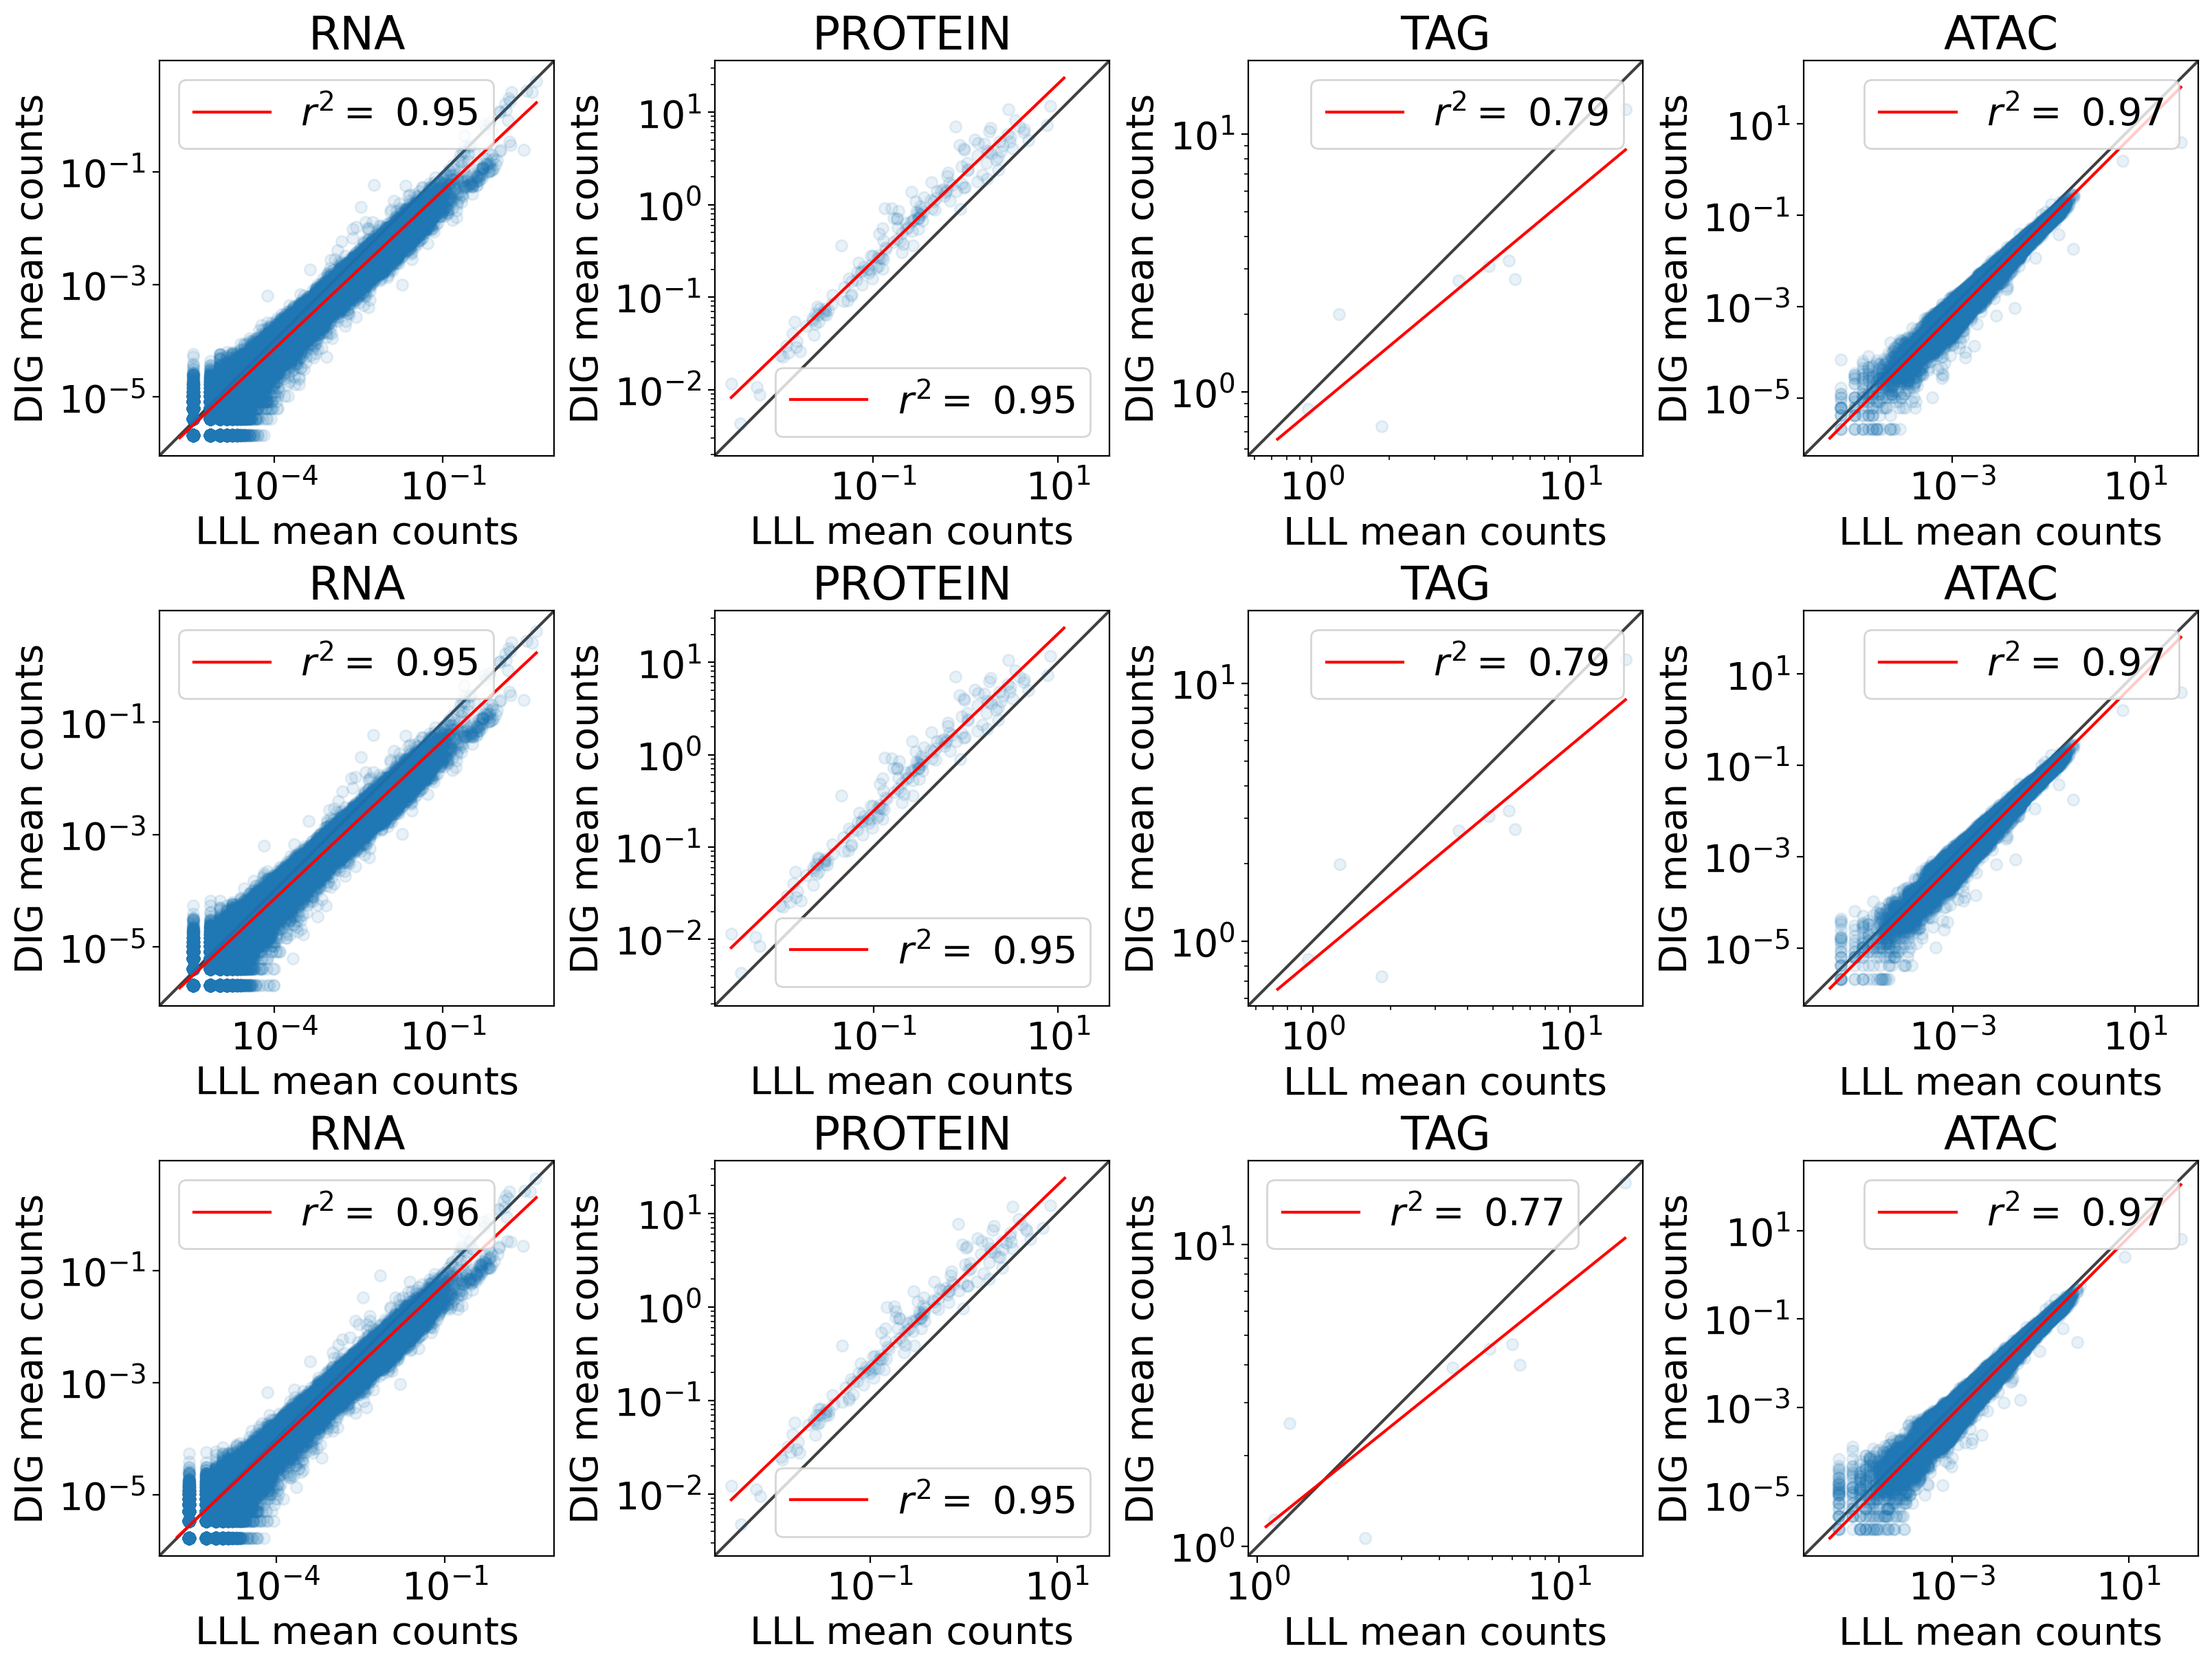

In [88]:
fig, axes = plt.subplots(figsize=(4*4,4*3), ncols=4, nrows=3, constrained_layout=True)

for idx, (axs, (ll, dg)) in enumerate(zip(axes, [(lll_1, dig_1), (lll_2, dig_2), (lll, dig)])):
    for ax, m in zip(axs, ["rna", "protein", "tag", "atac"]):
        
        measure = "counts_mean"
        x = ll[ll.obs["common"].values][m].var[measure]
        y = dg[dg.obs["common"].values][m].var[measure]
        
        ax.scatter(x,y, alpha=0.1)
        
        lr = LinearRegression()
        c = np.logical_and(x>0, y>0)
        log_x = np.log(x[c].values.reshape(-1,1))
        log_y = np.log(y[c].values)
        lr.fit(log_x, log_y)
        
        slope, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)
        
        xmin = min(x[c].min(), y[c].min())
        xmax = max(x[c].max(), y[c].max())
        
        inp = np.array([xmin,xmax])
        
        ax.plot(inp, np.exp(slope*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")
        
        title = m.upper()
        xlabel = "LLL mean counts"
        ylabel = "DIG mean counts"
        ax.set(**{
            "xlabel": xlabel,
            "ylabel": ylabel,
            "xscale": "log",
            "yscale": "log",
            "title": title
        })
        yex(ax)
        ax.legend()
fig.show()

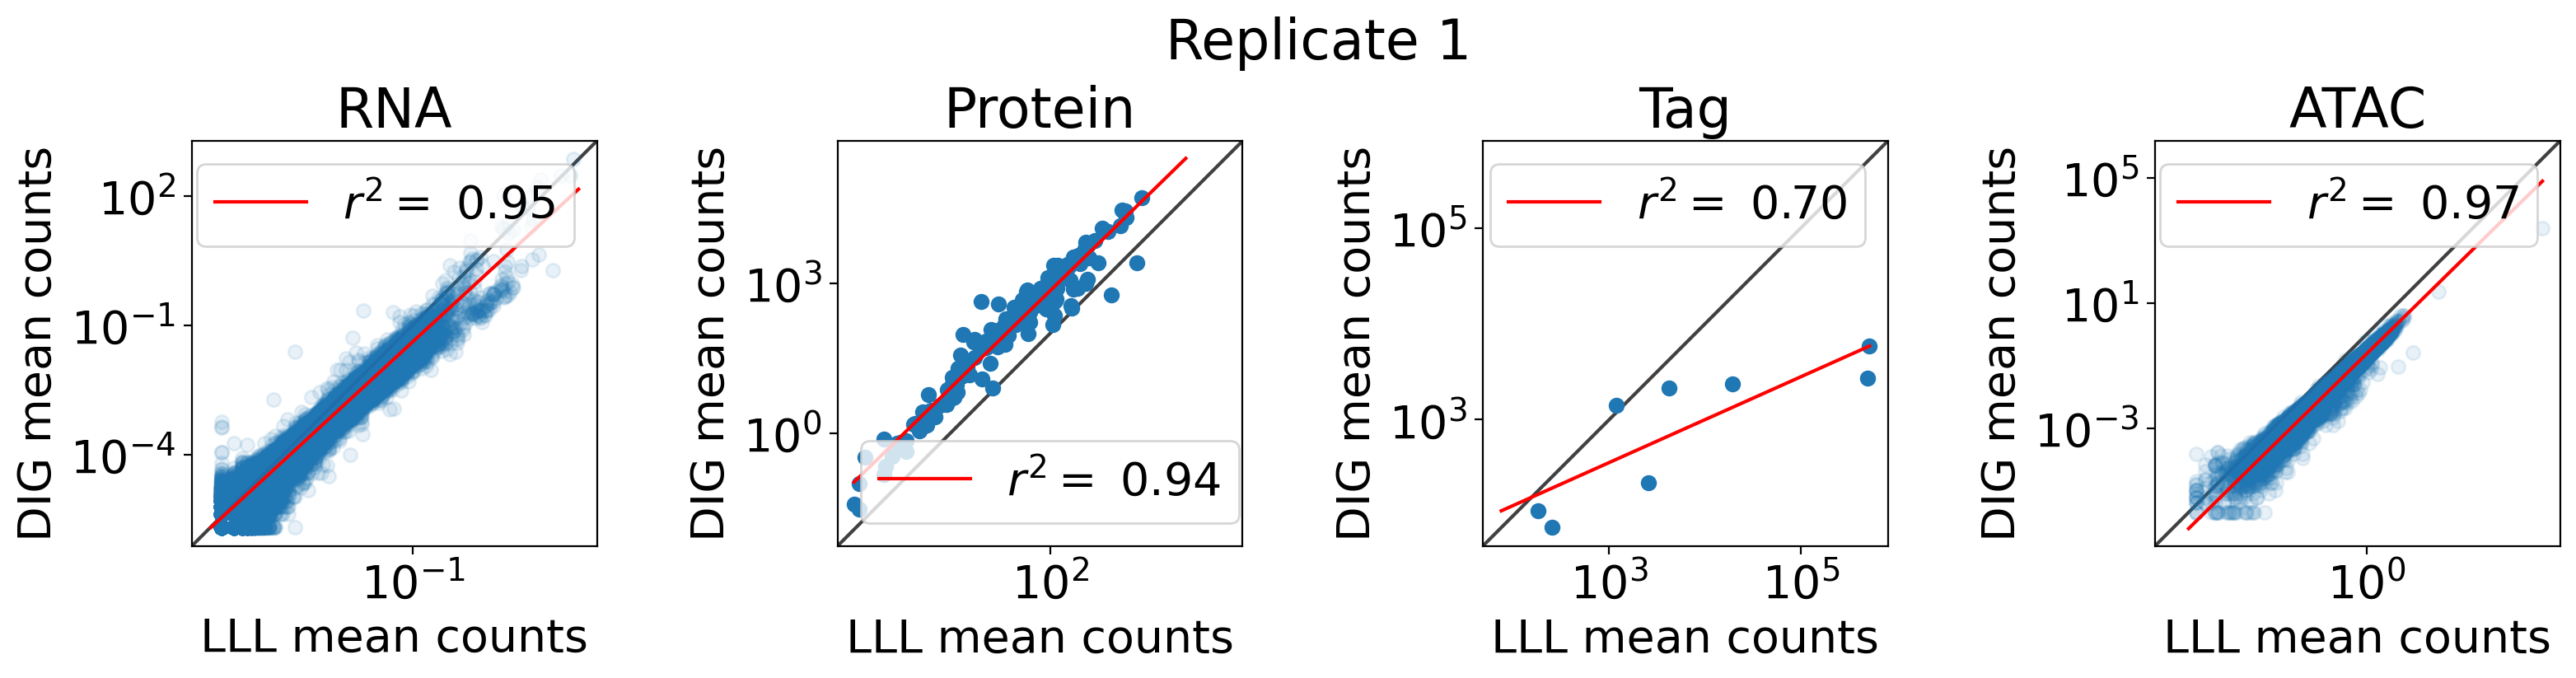

In [48]:
fig, axs = plt.subplots(figsize=(4*4,4), ncols=4, constrained_layout=True)
fig.suptitle("Replicate 1")

## RNA
ax = axs[0]
x = lll_1[lll_1.obs["common"].values]["rna"].var["counts_mean"]
y = dig_1[dig_1.obs["common"].values]["rna"].var["counts_mean"]

ax.scatter(x,y, alpha=0.1)

lr = LinearRegression()
c = np.logical_and(x>0, y>0)
log_x = np.log(x[c].values.reshape(-1,1))
log_y = np.log(y[c].values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x[c].min(), y[c].min())
xmax = max(x[c].max(), y[c].max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "RNA"
})
yex(ax)
ax.legend()

## Protein
ax = axs[1]
x = lll_1[lll_1.obs["common"].values]["protein"].var["counts_mean"]
y = dig_1[dig_1.obs["common"].values]["protein"].var["counts_mean"]

ax.scatter(x,y)

lr = LinearRegression()

log_x = np.log(x.values.reshape(-1,1))
log_y = np.log(y.values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x.min(), y.min())
xmax = max(x.max(), y.max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")

ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "Protein"
})
yex(ax)
ax.legend()

## Tag
ax = axs[2]
x = lll_1[lll_1.obs["common"].values]["tag"].var["counts_mean"]
y = dig_1[dig_1.obs["common"].values]["tag"].var["counts_mean"]

ax.scatter(x,y)

lr = LinearRegression()

log_x = np.log(x.values.reshape(-1,1))
log_y = np.log(y.values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x.min(), y.min())
xmax = max(x.max(), y.max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "Tag"
})
yex(ax)
ax.legend()

## ATAC
ax = axs[3]
x = lll_1[lll_1.obs["common"].values]["atac"].var["counts_mean"]
y = dig_1[dig_1.obs["common"].values]["atac"].var["counts_mean"]

ax.scatter(x,y, alpha=0.1)

lr = LinearRegression()
c = np.logical_and(x>0, y>0)
log_x = np.log(x[c].values.reshape(-1,1))
log_y = np.log(y[c].values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x[c].min(), y[c].min())
xmax = max(x[c].max(), y[c].max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "ATAC"
})
yex(ax)
ax.legend()

fig.show()

# Compare LLL and DIG rep 2

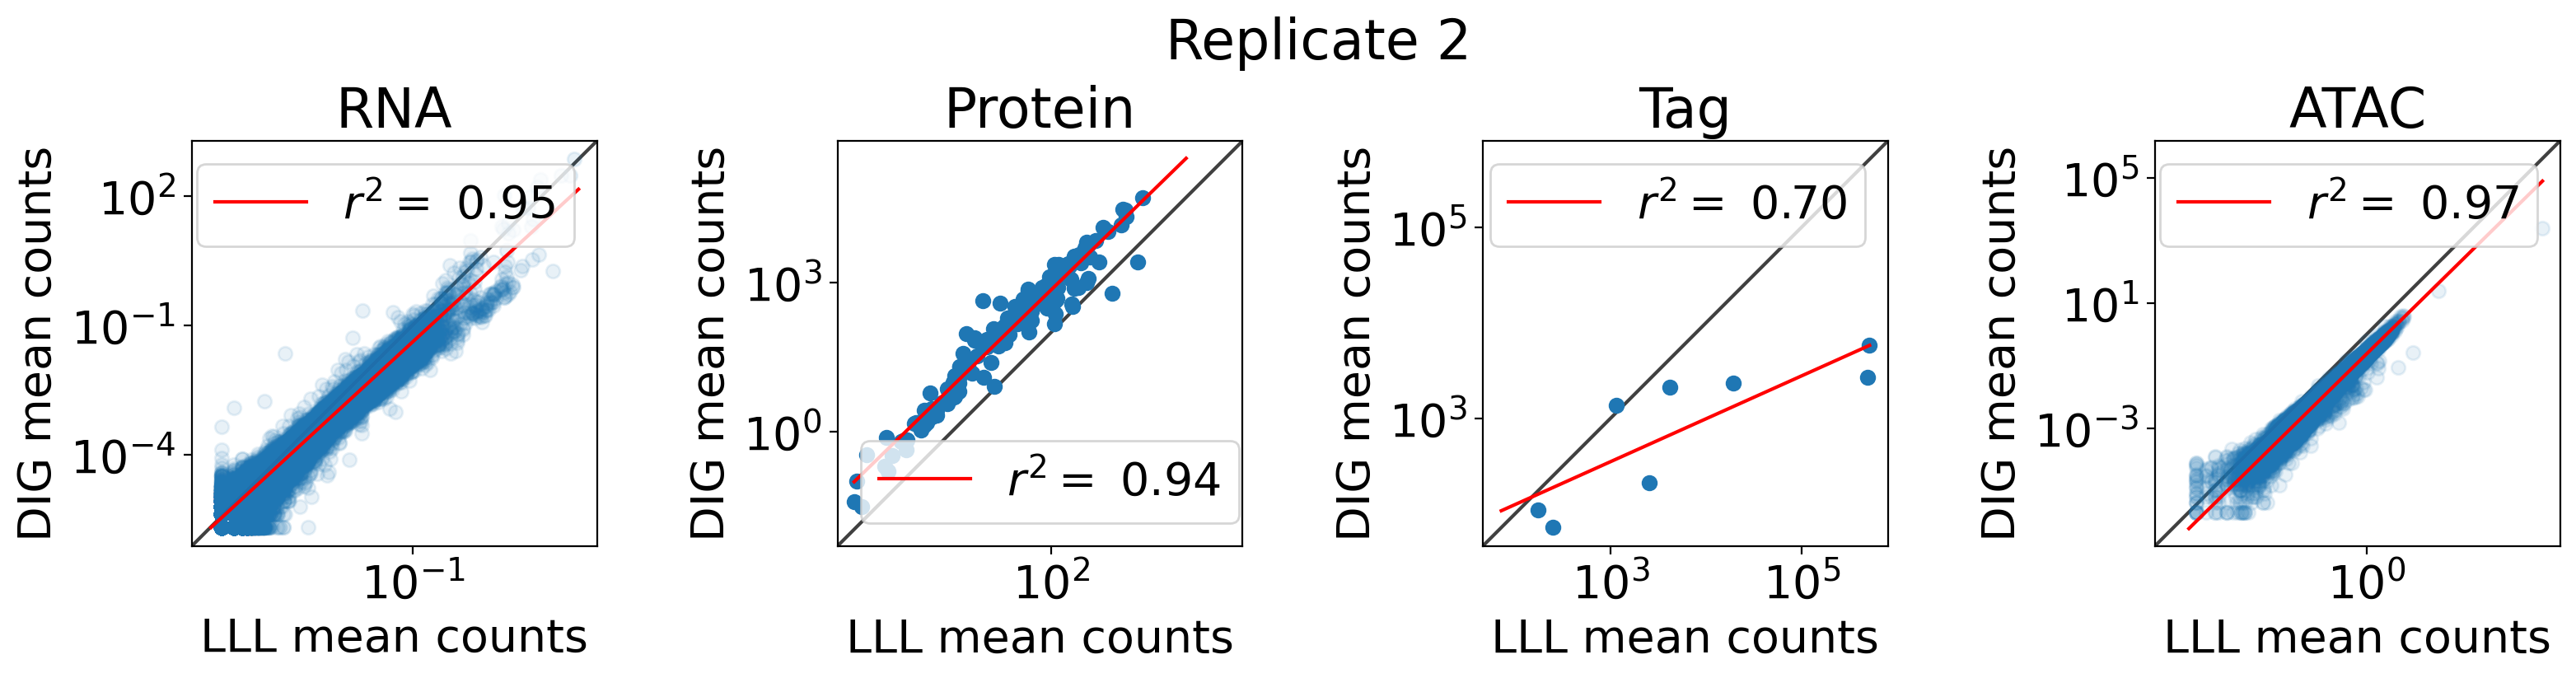

In [45]:
fig, axs = plt.subplots(figsize=(4*4,4), ncols=4, constrained_layout=True)
fig.suptitle("Replicate 2")

## RNA
ax = axs[0]
x = lll_2["rna"].var["counts_mean"]
y = dig_2["rna"].var["counts_mean"]

ax.scatter(x,y, alpha=0.1)

lr = LinearRegression()
c = np.logical_and(x>0, y>0)
log_x = np.log(x[c].values.reshape(-1,1))
log_y = np.log(y[c].values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x[c].min(), y[c].min())
xmax = max(x[c].max(), y[c].max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "RNA"
})
yex(ax)
ax.legend()

## Protein
ax = axs[1]
x = lll_2["protein"].var["counts_mean"]
y = dig_2["protein"].var["counts_mean"]

ax.scatter(x,y)

lr = LinearRegression()

log_x = np.log(x.values.reshape(-1,1))
log_y = np.log(y.values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x.min(), y.min())
xmax = max(x.max(), y.max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")

ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "Protein"
})
yex(ax)
ax.legend()

## Tag
ax = axs[2]
x = lll_2["tag"].var["counts_mean"]
y = dig_2["tag"].var["counts_mean"]

ax.scatter(x,y)

lr = LinearRegression()

log_x = np.log(x.values.reshape(-1,1))
log_y = np.log(y.values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x.min(), y.min())
xmax = max(x.max(), y.max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "Tag"
})
yex(ax)
ax.legend()

## ATAC
ax = axs[3]
x = lll_2["atac"].var["counts_mean"]
y = dig_2["atac"].var["counts_mean"]

ax.scatter(x,y, alpha=0.1)

lr = LinearRegression()
c = np.logical_and(x>0, y>0)
log_x = np.log(x[c].values.reshape(-1,1))
log_y = np.log(y[c].values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x[c].min(), y[c].min())
xmax = max(x[c].max(), y[c].max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "ATAC"
})
yex(ax)
ax.legend()

fig.show()

# Combined replicates

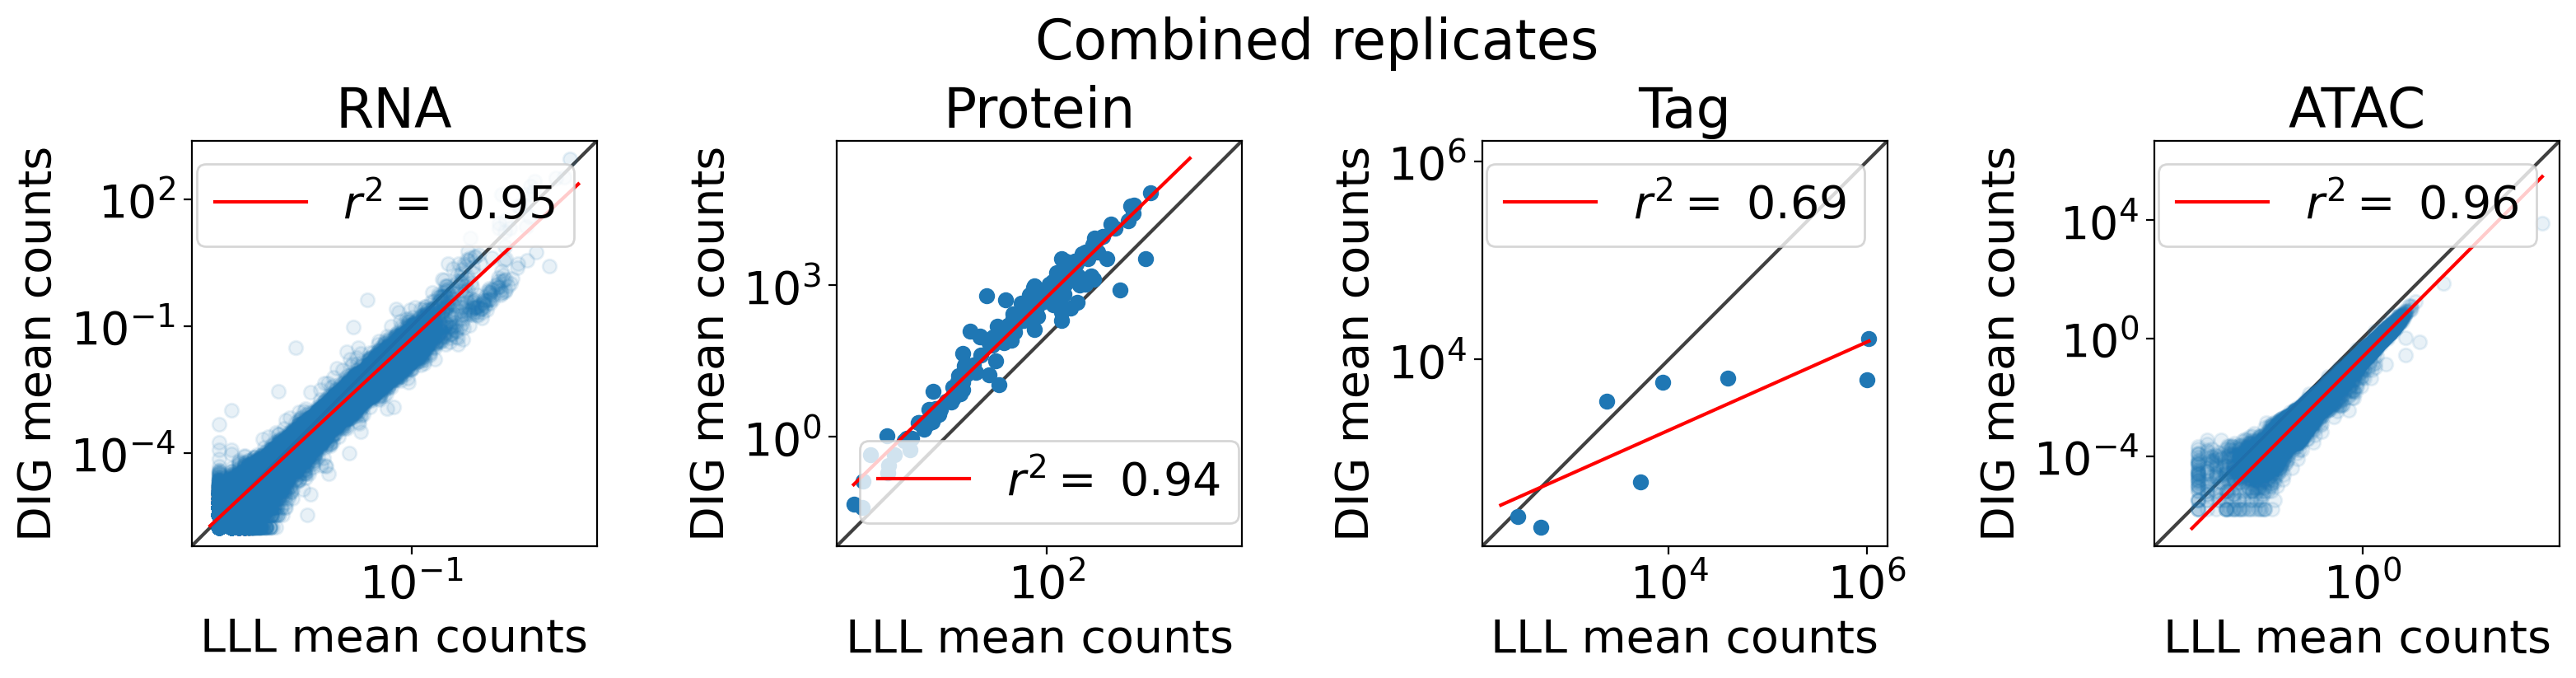

In [41]:
fig, axs = plt.subplots(figsize=(4*4,4), ncols=4, constrained_layout=True)
fig.suptitle("Combined replicates")

## RNA
ax = axs[0]
x = lll["rna"].var["counts_mean"]
y = dig["rna"].var["counts_mean"]

ax.scatter(x,y, alpha=0.1)

lr = LinearRegression()
c = np.logical_and(x>0, y>0)
log_x = np.log(x[c].values.reshape(-1,1))
log_y = np.log(y[c].values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x[c].min(), y[c].min())
xmax = max(x[c].max(), y[c].max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "RNA"
})
yex(ax)
ax.legend()

## Protein
ax = axs[1]
x = lll["protein"].var["counts_mean"]
y = dig["protein"].var["counts_mean"]

ax.scatter(x,y)

lr = LinearRegression()

log_x = np.log(x.values.reshape(-1,1))
log_y = np.log(y.values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x.min(), y.min())
xmax = max(x.max(), y.max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")

ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "Protein"
})
yex(ax)
ax.legend()

## Tag
ax = axs[2]
x = lll["tag"].var["counts_mean"]
y = dig["tag"].var["counts_mean"]

ax.scatter(x,y)

lr = LinearRegression()

log_x = np.log(x.values.reshape(-1,1))
log_y = np.log(y.values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x.min(), y.min())
xmax = max(x.max(), y.max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "Tag"
})
yex(ax)
ax.legend()

## ATAC
ax = axs[3]
x = lll["atac"].var["counts_mean"]
y = dig["atac"].var["counts_mean"]

ax.scatter(x,y, alpha=0.1)

lr = LinearRegression()
c = np.logical_and(x>0, y>0)
log_x = np.log(x[c].values.reshape(-1,1))
log_y = np.log(y[c].values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x[c].min(), y[c].min())
xmax = max(x[c].max(), y[c].max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL mean counts",
    "ylabel": "DIG mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "ATAC"
})
yex(ax)
ax.legend()

fig.show()

# Control (Replicate against each other)

ValueError: x and y must be the same size

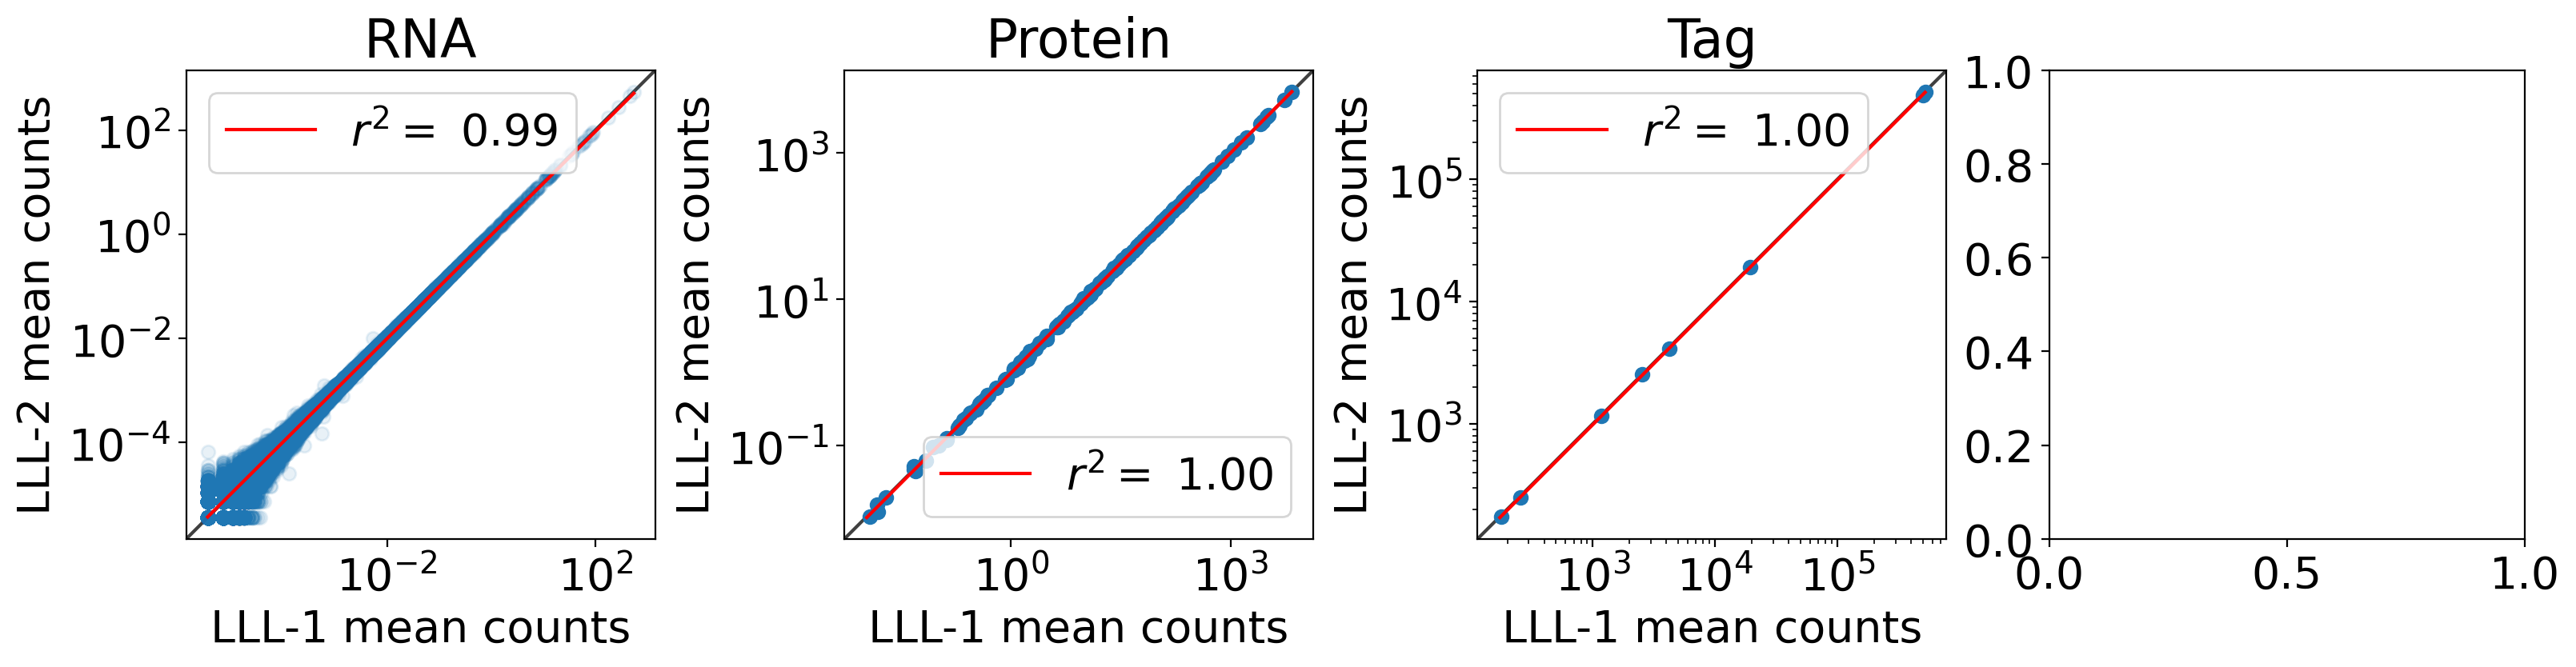

In [20]:
fig, axs = plt.subplots(figsize=(4*4,4), ncols=4, constrained_layout=True)

## RNA
ax = axs[0]
x = lll_1["rna"].var["counts_mean"]
y = lll_2["rna"].var["counts_mean"]

ax.scatter(x,y, alpha=0.1)

lr = LinearRegression()
c = np.logical_and(x>0, y>0)
log_x = np.log(x[c].values.reshape(-1,1))
log_y = np.log(y[c].values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x[c].min(), y[c].min())
xmax = max(x[c].max(), y[c].max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL-1 mean counts",
    "ylabel": "LLL-2 mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "RNA"
})
yex(ax)
ax.legend()

## Protein
ax = axs[1]
x = lll_1["protein"].var["counts_mean"]
y = lll_2["protein"].var["counts_mean"]

ax.scatter(x,y)

lr = LinearRegression()

log_x = np.log(x.values.reshape(-1,1))
log_y = np.log(y.values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x.min(), y.min())
xmax = max(x.max(), y.max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")

ax.set(**{
    "xlabel": "LLL-1 mean counts",
    "ylabel": "LLL-2 mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "Protein"
})
yex(ax)
ax.legend()

## Tag
ax = axs[2]
x = lll_1["tag"].var["counts_mean"]
y = lll_2["tag"].var["counts_mean"]

ax.scatter(x,y)

lr = LinearRegression()

log_x = np.log(x.values.reshape(-1,1))
log_y = np.log(y.values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x.min(), y.min())
xmax = max(x.max(), y.max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL-1 mean counts",
    "ylabel": "LLL-2 mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "Tag"
})
yex(ax)
ax.legend()

## ATAC
ax = axs[3]
x = lll_1["atac"].var["counts_mean"]
y = lll_2["atac"].var["counts_mean"]

ax.scatter(x,y, alpha=0.1)

lr = LinearRegression()
c = np.logical_and(x>0, y>0)
log_x = np.log(x[c].values.reshape(-1,1))
log_y = np.log(y[c].values)
lr.fit(log_x, log_y)

m, b, r2 = lr.coef_[0], lr.intercept_, lr.score(log_x, log_y)

xmin = min(x[c].min(), y[c].min())
xmax = max(x[c].max(), y[c].max())

inp = np.array([xmin,xmax])

ax.plot(inp, np.exp(m*np.log(inp) + b), label=f"$r^2 =$ {r2:,.2f}", color="red")


ax.set(**{
    "xlabel": "LLL-1 mean counts",
    "ylabel": "LLL-2 mean counts",
    "xscale": "log",
    "yscale": "log",
    "title": "ATAC"
})
yex(ax)
ax.legend()

fig.show()

184.07985001152065

In [17]:
lll_1, lll_2

(MuData object with n_obs × n_vars = 277402 × 142332
   var:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
   4 modalities
     rna:	277402 x 62754
       obs:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
       var:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
     tag:	277402 x 8
       obs:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
       var:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
     protein:	277402 x 163
       obs:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
       var:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
     atac:	277402 x 79407
       obs:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
    

In [18]:
dig_1, dig_2

(MuData object with n_obs × n_vars = 482624 × 142332
   var:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
   4 modalities
     rna:	482624 x 62754
       obs:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
       var:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
     tag:	482624 x 8
       obs:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
       var:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
     protein:	482624 x 163
       obs:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
       var:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
     atac:	482624 x 79407
       obs:	'counts_min', 'counts_max', 'counts_sum', 'counts_mean', 'counts_nnzero', 'counts_variance'
    

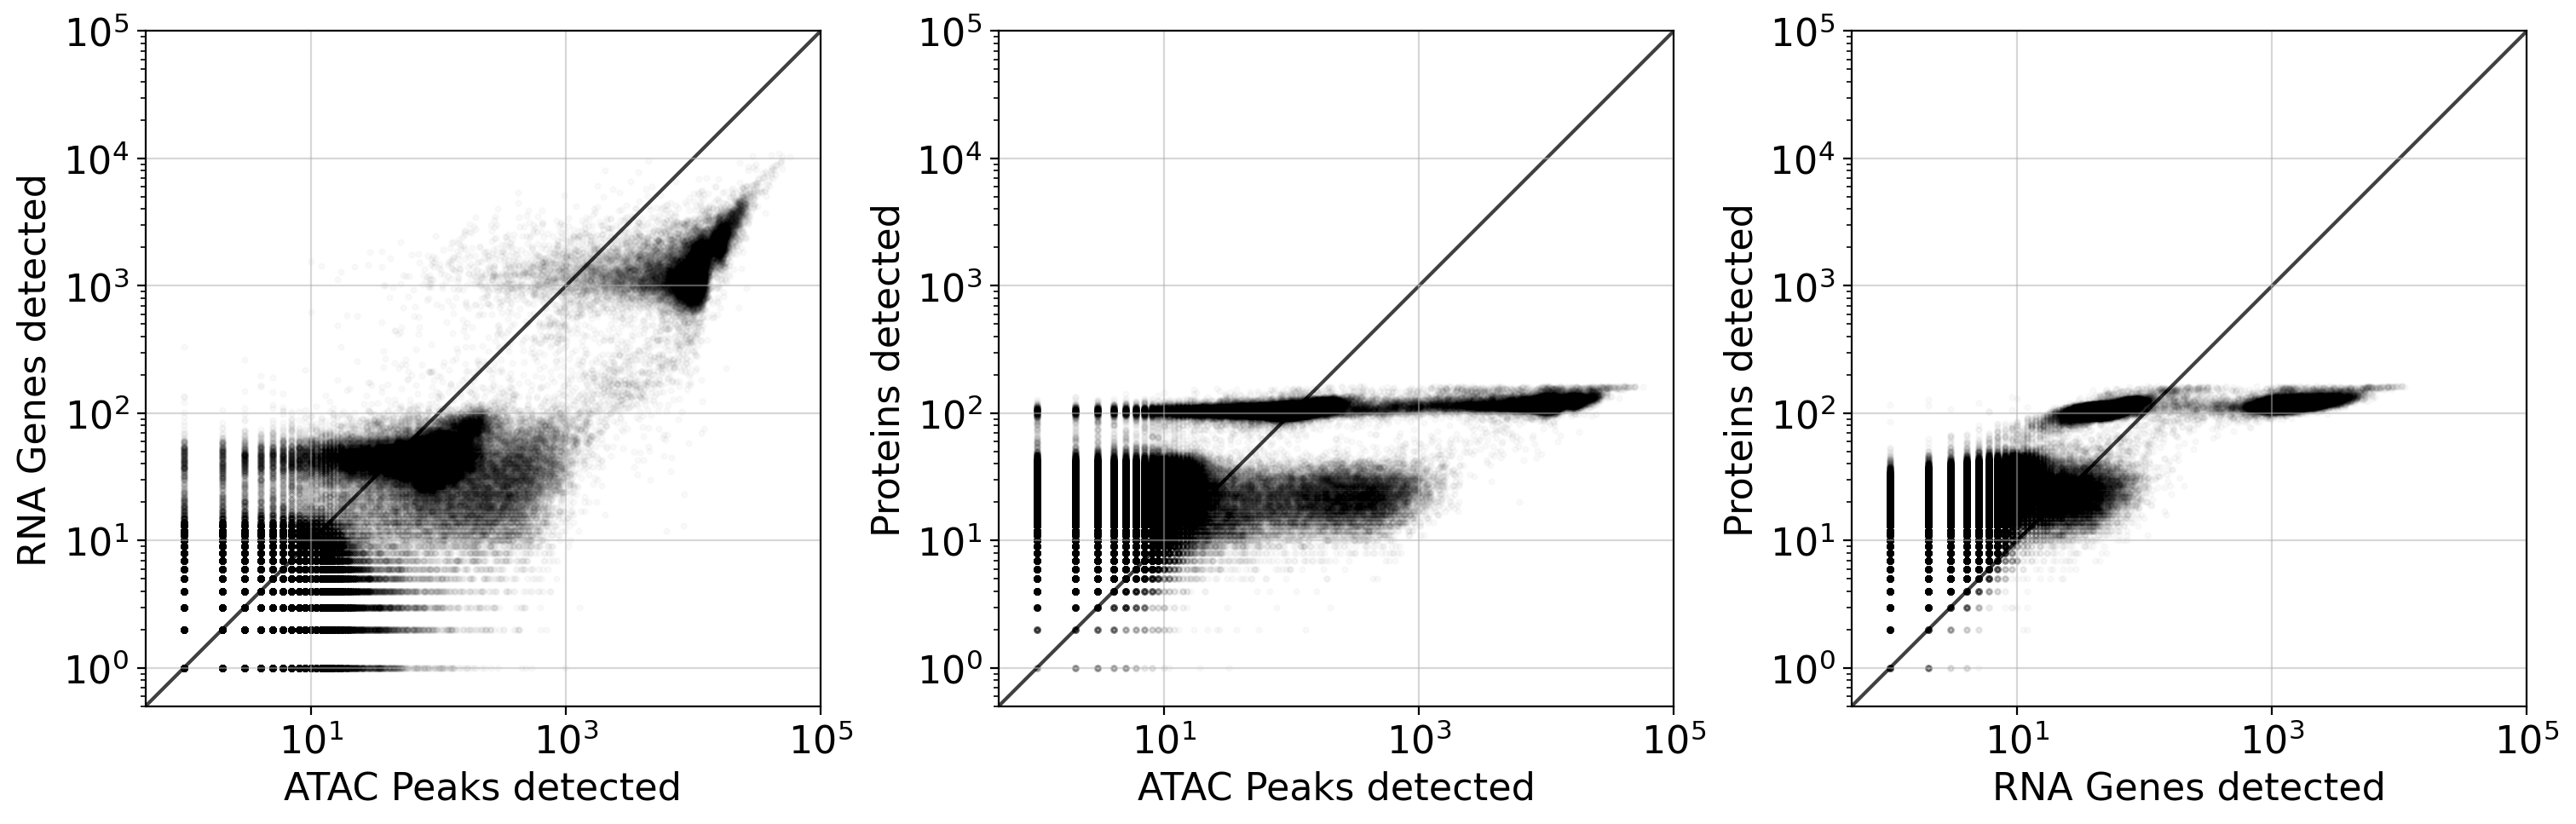

In [155]:
fig, axs = plt.subplots(figsize=(15,5), constrained_layout=True, ncols=3)

ax = axs[0]
x = dig.obs["atac:counts_nnzero"]
y = dig.obs["rna:counts_nnzero"]

ax.scatter(x,y, s=5, color="k", alpha=0.02)

# xx = np.arange(x.min(), x.max())
# y = -xx + 1000
# ax.plot(xx, y, color="k", linestyle="dotted")

ax.set(**{
    # "title": "DOGMA-seq",
    "xlabel": "ATAC Peaks detected",
    "ylabel": "RNA Genes detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (0.5, 1e5),
    "ylim": (0.5, 1e5)
})
yex(ax)
ax.grid(alpha=0.5)

########
ax = axs[1]

x = dig.obs["atac:counts_nnzero"]
y = dig.obs["protein:counts_nnzero"]

ax.scatter(x,y, s=5, color="k", alpha=0.02)

# xx = np.arange(x.min(), x.max())
# y = -xx + 1000
# ax.plot(xx, y, color="k", linestyle="dotted")

ax.set(**{
    # "title": "DOGMA-seq",
    "xlabel": "ATAC Peaks detected",
    "ylabel": "Proteins detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (0.5, 1e5),
    "ylim": (0.5, 1e5)
})
yex(ax)
ax.grid(alpha=0.5)

################
ax = axs[2]

x = dig.obs["rna:counts_nnzero"]
y = dig.obs["protein:counts_nnzero"]

ax.scatter(x,y, s=5, color="k", alpha=0.02)

# xx = np.arange(x.min(), x.max())
# y = -xx + 1000
# ax.plot(xx, y, color="k", linestyle="dotted")

ax.set(**{
    # "title": "DOGMA-seq",
    "xlabel": "RNA Genes detected",
    "ylabel": "Proteins detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (0.5, 1e5),
    "ylim": (0.5, 1e5)
})
yex(ax)
ax.grid(alpha=0.5)
fig.savefig("dogmaseq.png", bbox_inches="tight", dpi=300)
fig.show()

In [144]:
rna_mult = anndata.read_h5ad("/home/sina/projects/cellatlas/data/dogmaseq-dig/rna/counts_mult/adata.h5ad")
protein_mult = anndata.read_h5ad("/home/sina/projects/cellatlas/data/dogmaseq-dig/protein/counts_mult/adata.h5ad")
tag_mult = anndata.read_h5ad("/home/sina/projects/cellatlas/data/dogmaseq-dig/tag/counts_mult/adata.h5ad")

In [102]:
dig.obs.index

Index(['AAACAGCCAAACATAG', 'AAACAGCCAAACCTAT', 'AAACAGCCAAACCTTG',
       'AAACAGCCAAACGCGA', 'AAACAGCCAAACGGGC', 'AAACAGCCAAACTAAG',
       'AAACAGCCAAACTCAT', 'AAACAGCCAAACTGTT', 'AAACAGCCAAAGCGCA',
       'AAACAGCCAAAGCTAA',
       ...
       'TTTGTTGGTTTGAGGC', 'TTTGTTGGTTTGCAGA', 'TTTGTTGGTTTGCGCC',
       'TTTGTTGGTTTGGCTT', 'TTTGTTGGTTTGGGCG', 'TTTGTTGGTTTGGGTA',
       'TTTGTTGGTTTGGTTC', 'TTTGTTGGTTTGTCTA', 'TTTGTTGGTTTGTGGA',
       'TTTGTTGGTTTGTTGC'],
      dtype='object', name='bcs', length=590860)

In [145]:
rna_mult_sum = nd(rna_mult[dig.obs.index.values].X.sum(1))
protein_mult_sum = nd(protein_mult[dig.obs.index.values].X.sum(1))
tag_mult_sum = nd(tag_mult[dig.obs.index.values].X.sum(1))

In [146]:
dig["rna"].obs["counts_mult_sum"] = rna_mult_sum
dig["protein"].obs["counts_mult_sum"] = protein_mult_sum
dig["tag"].obs["counts_mult_sum"] = tag_mult_sum

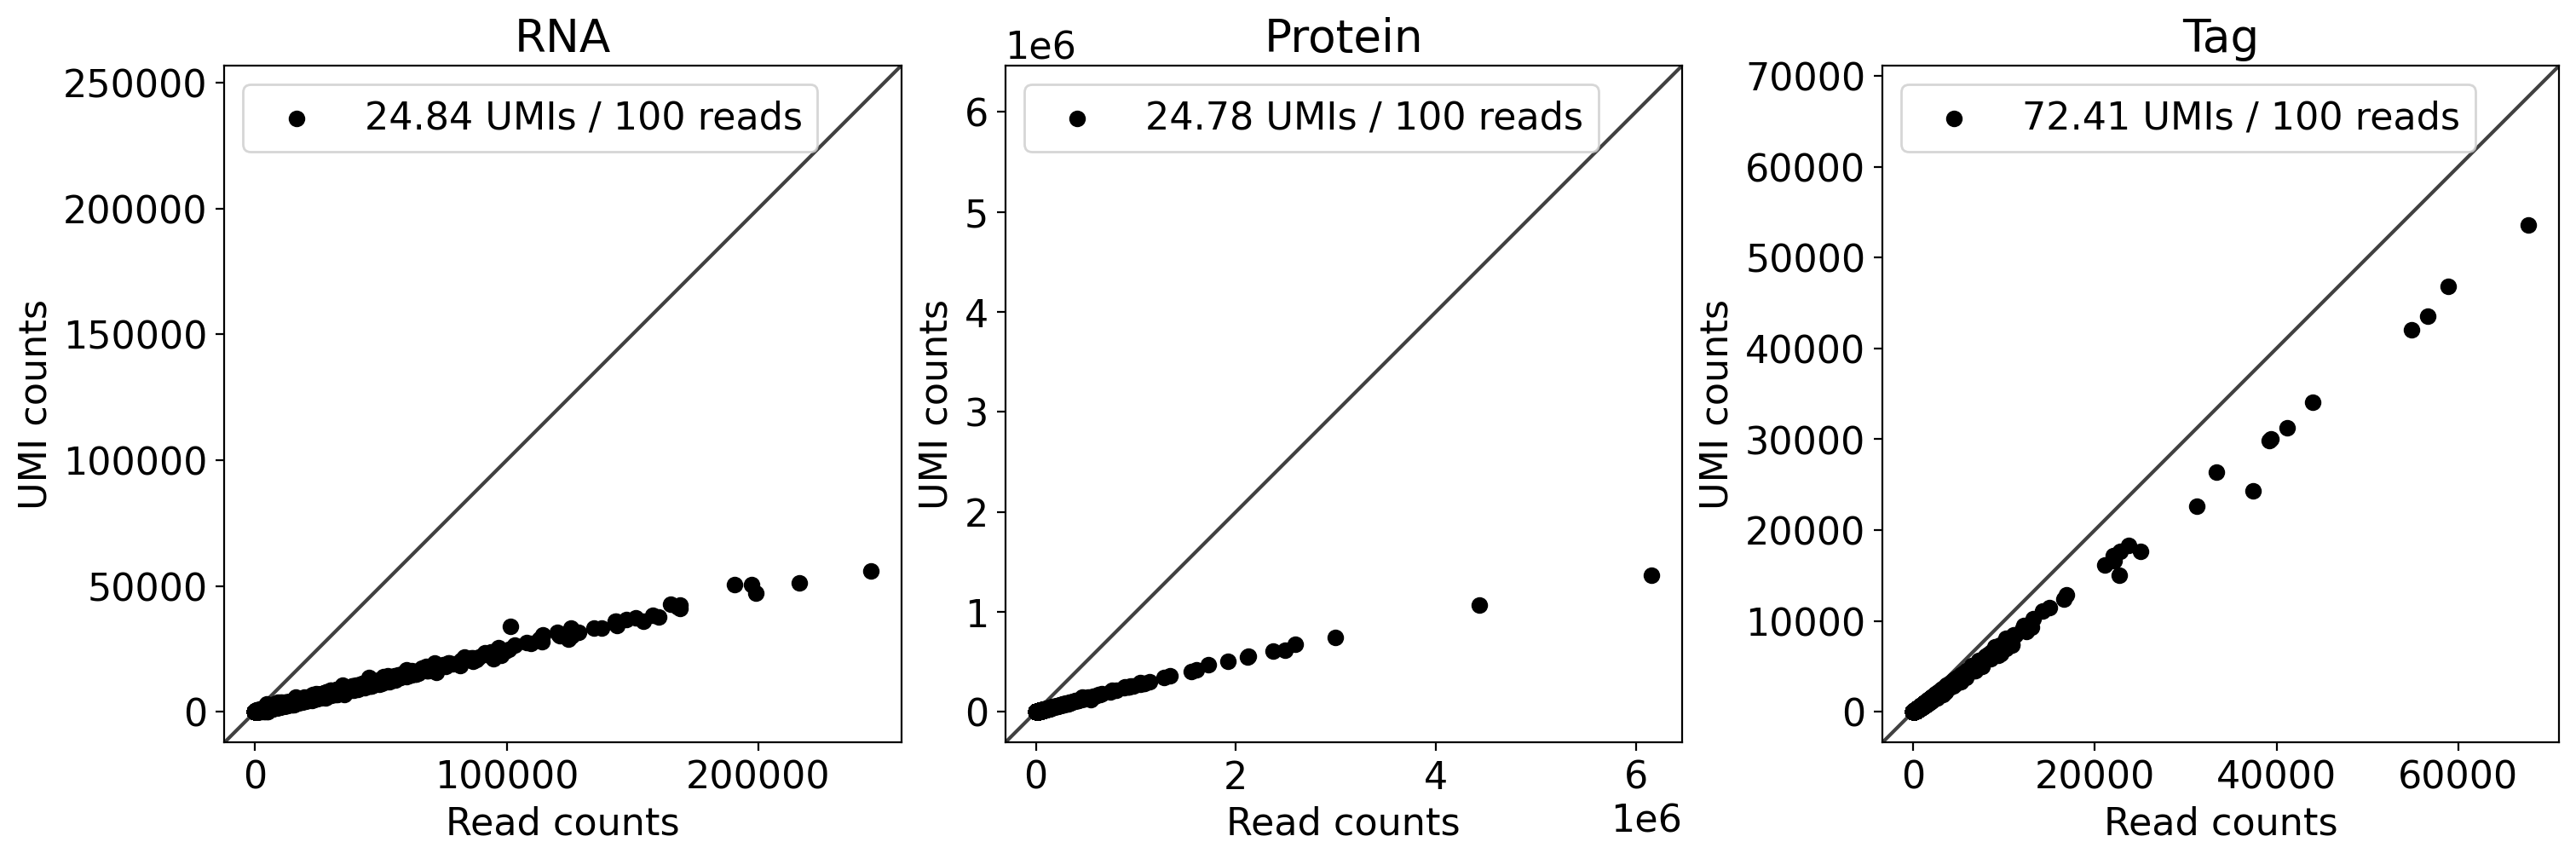

In [153]:
fig, axs = plt.subplots(figsize=(15,5), ncols=3, constrained_layout=True)

ax = axs[0]
x = dig["rna"].obs["counts_mult_sum"].values
y = dig["rna"].obs["counts_sum"].values

lx, ly = x.reshape(-1,1), y
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.scatter(x,y, label=f"{reg.coef_[0]*100:,.2f} UMIs / 100 reads", color="k")

ax.set(**{
    "title": "RNA",
    "xlabel": "Read counts",
    "ylabel": "UMI counts",
})
yex(ax)
ax.legend(loc="upper left")
ax = axs[1]
x = dig["protein"].obs["counts_mult_sum"].values
y = dig["protein"].obs["counts_sum"].values

lx, ly = x.reshape(-1,1), y
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.scatter(x,y, label=f"{reg.coef_[0]*100:,.2f} UMIs / 100 reads", color="k")

ax.set(**{
    "title": "Protein",
    "xlabel": "Read counts",
    "ylabel": "UMI counts",
})
yex(ax)
ax.legend(loc="upper left")

##
ax = axs[2]
x = dig["tag"].obs["counts_mult_sum"].values
y = dig["tag"].obs["counts_sum"].values

lx, ly = x.reshape(-1,1), y
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.scatter(x,y, label=f"{reg.coef_[0]*100:,.2f} UMIs / 100 reads", color="k")

ax.set(**{
    "title": "Tag",
    "xlabel": "Read counts",
    "ylabel": "UMI counts",
})
yex(ax)
ax.legend(loc="upper left")
fig.savefig("reads_v_umis.png", dpi=300, bbox_inches="tight")
fig.show()

# LLL

In [157]:
rna_mult = anndata.read_h5ad("/home/sina/projects/cellatlas/data/dogmaseq-lll/rna/counts_mult/adata.h5ad")
protein_mult = anndata.read_h5ad("/home/sina/projects/cellatlas/data/dogmaseq-lll/protein/counts_mult/adata.h5ad")
tag_mult = anndata.read_h5ad("/home/sina/projects/cellatlas/data/dogmaseq-lll/tag/counts_mult/adata.h5ad")

In [158]:
rna_mult_sum = nd(rna_mult[lll.obs.index.values].X.sum(1))
protein_mult_sum = nd(protein_mult[lll.obs.index.values].X.sum(1))
tag_mult_sum = nd(tag_mult[lll.obs.index.values].X.sum(1))

In [159]:
lll["rna"].obs["counts_mult_sum"] = rna_mult_sum
lll["protein"].obs["counts_mult_sum"] = protein_mult_sum
lll["tag"].obs["counts_mult_sum"] = tag_mult_sum

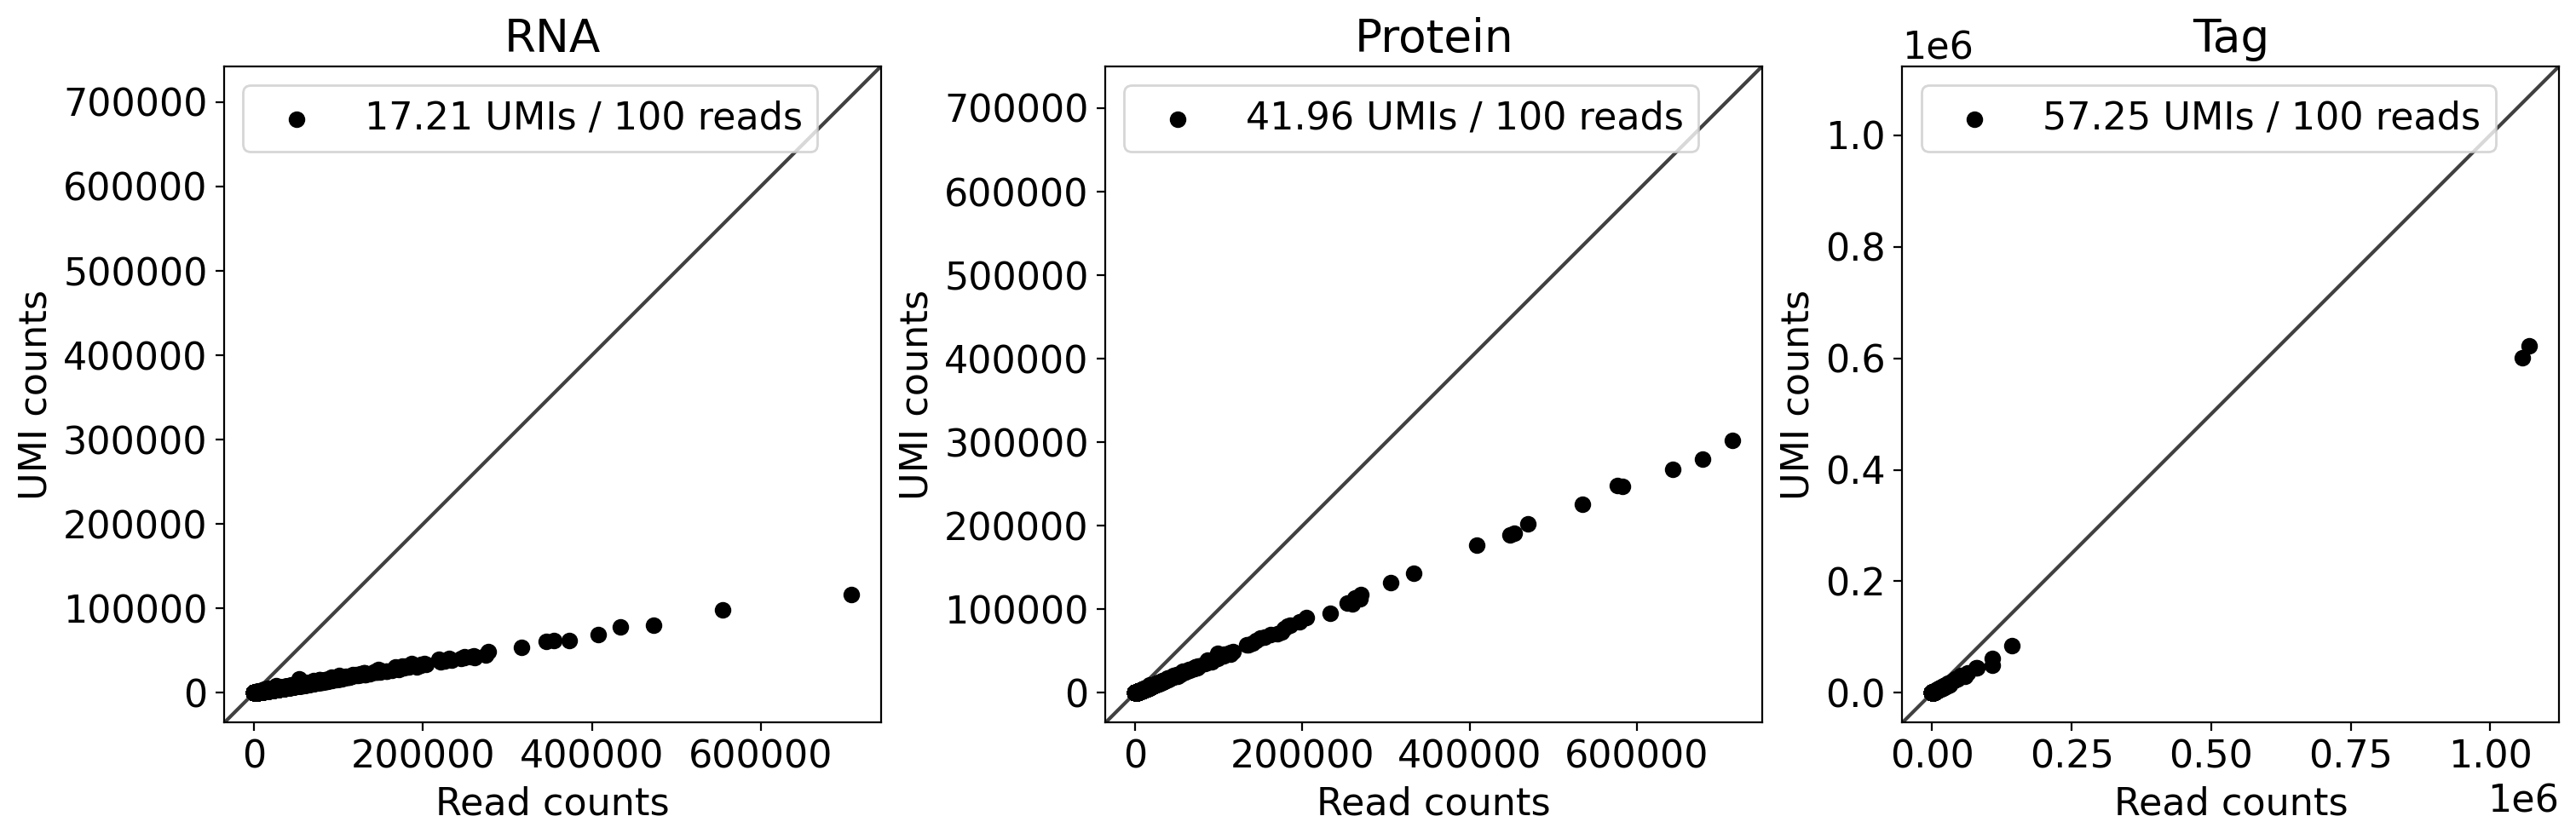

In [160]:
fig, axs = plt.subplots(figsize=(15,5), ncols=3, constrained_layout=True)

ax = axs[0]
x = lll["rna"].obs["counts_mult_sum"].values
y = lll["rna"].obs["counts_sum"].values

lx, ly = x.reshape(-1,1), y
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.scatter(x,y, label=f"{reg.coef_[0]*100:,.2f} UMIs / 100 reads", color="k")

ax.set(**{
    "title": "RNA",
    "xlabel": "Read counts",
    "ylabel": "UMI counts",
})
yex(ax)
ax.legend(loc="upper left")
ax = axs[1]
x = lll["protein"].obs["counts_mult_sum"].values
y = lll["protein"].obs["counts_sum"].values

lx, ly = x.reshape(-1,1), y
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.scatter(x,y, label=f"{reg.coef_[0]*100:,.2f} UMIs / 100 reads", color="k")

ax.set(**{
    "title": "Protein",
    "xlabel": "Read counts",
    "ylabel": "UMI counts",
})
yex(ax)
ax.legend(loc="upper left")

##
ax = axs[2]
x = lll["tag"].obs["counts_mult_sum"].values
y = lll["tag"].obs["counts_sum"].values

lx, ly = x.reshape(-1,1), y
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.scatter(x,y, label=f"{reg.coef_[0]*100:,.2f} UMIs / 100 reads", color="k")

ax.set(**{
    "title": "Tag",
    "xlabel": "Read counts",
    "ylabel": "UMI counts",
})
yex(ax)
ax.legend(loc="upper left")
# fig.savefig("reads_v_umis.png", dpi=300, bbox_inches="tight")
fig.show()

In [209]:
fs = [
    {"path": "/home/sina/projects/cellatlas/data/dogmaseq-lll/rna/run_info.json", "cond": "lll", "modality": "rna"},
    {"path": "/home/sina/projects/cellatlas/data/dogmaseq-lll/tag/run_info.json", "cond": "lll", "modality": "tag"},
    {"path": "/home/sina/projects/cellatlas/data/dogmaseq-lll/protein/run_info.json", "cond": "lll", "modality": "protein"},
    {"path": "/home/sina/projects/cellatlas/data/dogmaseq-dig/rna/run_info.json", "cond": "dig", "modality": "rna"},
    {"path": "/home/sina/projects/cellatlas/data/dogmaseq-dig/tag/run_info.json", "cond": "dig", "modality": "tag"},
    {"path": "/home/sina/projects/cellatlas/data/dogmaseq-dig/protein/run_info.json", "cond": "dig", "modality": "protein"},
]

In [210]:
import json

In [211]:
b = []
for d in fs:
    path = d["path"]
    cond = d["cond"]
    modality = d["modality"]
    with open(path, 'r') as f:
        d = json.load(f)
        d["cond"] = cond
        d["modality"] = modality
        b.append(d)

In [215]:
df = pd.DataFrame(b)[["cond", "modality", "n_processed", "n_pseudoaligned", "p_pseudoaligned"]].sort_values("modality")

In [ ]:
df.plot("","")

In [176]:
v

'/home/sina/projects/cellatlas/data/dogmaseq-lll/rna/run_info.json'

In [193]:
b

[{'n_targets': 0,
  'n_bootstraps': 0,
  'n_processed': 889518234,
  'n_pseudoaligned': 470353381,
  'n_unique': 137090535,
  'p_pseudoaligned': 52.9,
  'p_unique': 15.4,
  'kallisto_version': '0.48.0',
  'index_version': 0,
  'start_time': 'Thu Aug 31 08:56:19 2023',
  'call': '/home/sina/miniconda3/lib/python3.10/site-packages/kb_python/bins/compiled/kallisto/kallisto bus -i rna/index.idx -o rna -x 0,0,16:0,16,28:1,0,102 -t 16 fastqs/rna_R1_SRR18677629.fastq.gz fastqs/rna_R2_SRR18677629.fastq.gz fastqs/rna_R1_SRR18677630.fastq.gz fastqs/rna_R2_SRR18677630.fastq.gz'},
 {'n_targets': 0,
  'n_bootstraps': 0,
  'n_processed': 47555379,
  'n_pseudoaligned': 44276656,
  'n_unique': 44276656,
  'p_pseudoaligned': 93.1,
  'p_unique': 93.1,
  'kallisto_version': '0.48.0',
  'index_version': 0,
  'start_time': 'Thu Aug 31 09:31:28 2023',
  'call': '/home/sina/miniconda3/lib/python3.10/site-packages/kb_python/bins/compiled/kallisto/kallisto bus -i tag/index.idx -o tag -x 0,0,16:0,16,28:1,0,15 -

In [219]:
md = [
    ("dig", "protein", 24.78),
    ("dig", "rna", 28.84),
    ("dig", "tag", 72.41),
    ("lll", "protein", 41.96),
    ("lll", "rna", 17.21),
    ("lll", "tag", 57.25)
]

In [220]:
df = df.sort_values(["cond", "modality"])

In [221]:
np.array(md)[:,-1]

array(['24.78', '28.84', '72.41', '41.96', '17.21', '57.25'], dtype='<U32')

In [222]:
df["slope"] = np.array(md)[:,-1]

In [223]:
df

,cond,modality,n_processed,n_pseudoaligned,p_pseudoaligned,slope
5,dig,protein,740344635,709687533,95.9,24.78
3,dig,rna,735897147,299988694,40.8,28.84
4,dig,tag,39478884,37781884,95.7,72.41
2,lll,protein,154968792,148053797,95.5,41.96
0,lll,rna,889518234,470353381,52.9,17.21
1,lll,tag,47555379,44276656,93.1,57.25


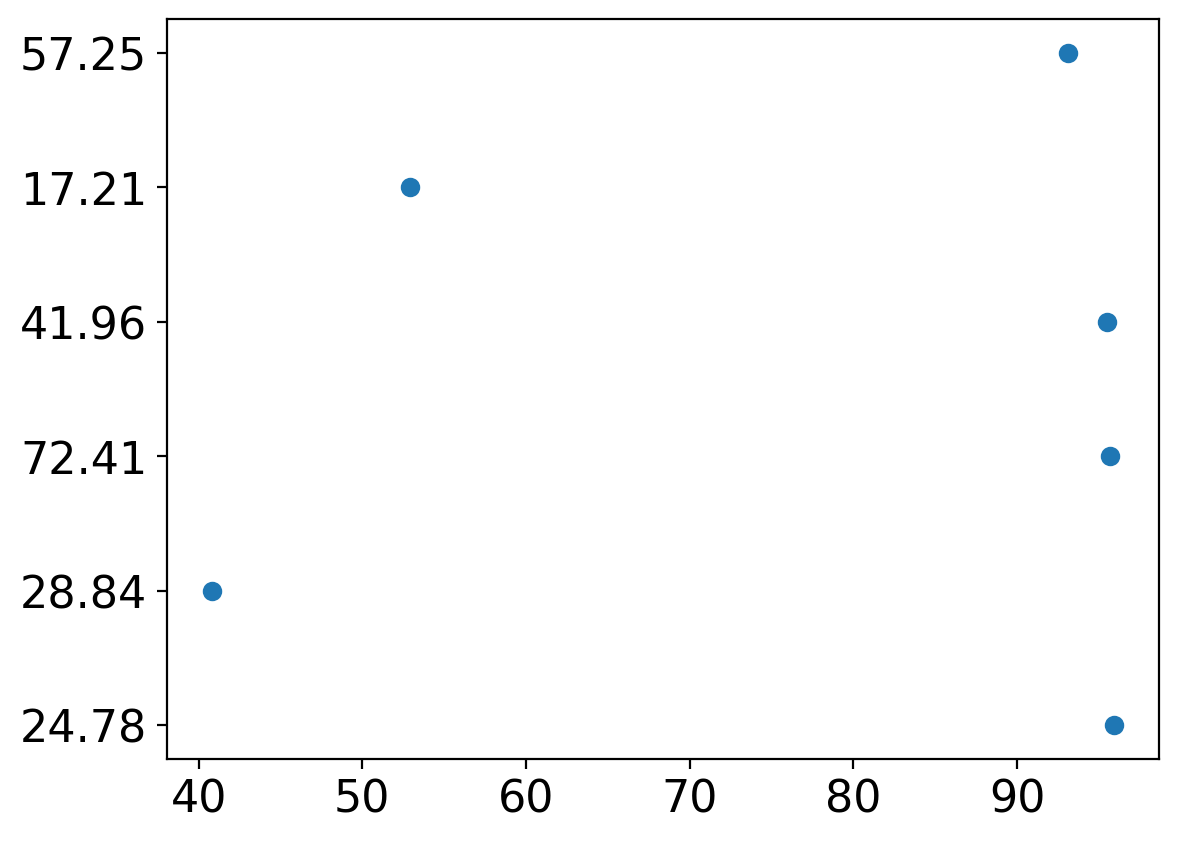

In [225]:
fig, ax = plt.subplots()

x = df["p_pseudoaligned"]
y = df["slope"]

ax.scatter(x,y)

fig.show()